In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [101]:
df = pd.read_csv("training_set_features.csv")

In [102]:
mappings = {
    "age_group": {
        "65+ Years": 1,
        "55 - 64 Years": 2,
        "45 - 54 Years": 3,
        "18 - 34 Years": 4,
        "35 - 44 Years":5,
        "Other": 6,

    },
    "education": {
        "College Graduate": 1,
        "Some College": 2,
        "12 Years": 3,
        "Other": 4
    },
    "race": {
        "White": 1,
        "Black": 2,
        "Hispanic": 3,
        "Other": 4
    },
    "income_poverty": {
        "<= $75,000, Above Poverty": 1,
        "> $75,000": 2,
        "Below Poverty": 3
    },
    "marital_status": {
        "Married": 1,
        "Not Married": 2
    },
    "rent_or_own": {
        "Own": 1,
        "Rent": 2
    },
    "sex": {
        "Female": 1,
        "Male": 2
    },
    "employment_status": {
        "Not in Labor Force": 1,
        "Employed": 2,
        "Unemployed": 3
    },
    "census_msa": {
        "MSA, Not Principle  City": 1,
        "MSA, Principle City": 2,
        "Non-MSA": 3
    }
}


In [103]:
df_labeled = df.copy()

for col, mapping in mappings.items():
    df_labeled[col] = df_labeled[col].map(mapping)

In [104]:
results = pd.read_csv("training_set_labels.csv")

In [105]:
threshold = 0.2
for col in df_labeled.columns:
    if df_labeled[col].isna().sum()/len(df_labeled)>threshold:
        print(f"More than {threshold:.0%} in {col} are missing ({df_labeled[col].isna().sum()/len(df_labeled):.02%})")

More than 20% in health_insurance are missing (45.96%)
More than 20% in employment_industry are missing (49.91%)
More than 20% in employment_occupation are missing (50.44%)


In [106]:
threshold = 0.2
for col in df.columns:
    if df[col].isna().sum()/len(df)>threshold:
        print(f"More than {threshold:.0%} in {col} are missing ({df[col].isna().sum()/len(df):.02%})")

More than 20% in health_insurance are missing (45.96%)
More than 20% in employment_industry are missing (49.91%)
More than 20% in employment_occupation are missing (50.44%)


In [108]:
threshold = 0.2
test = df_labeled.copy()
for col in test.columns:
    if test[col].isna().sum()/len(test)>threshold:
        test.drop(columns=col, axis=1, inplace=True)

len(test)

26707

In [111]:
test.drop(["hhs_geo_region"], axis=1, inplace=True)

In [113]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_filled = imputer.fit_transform(test)

cleaned_df = pd.DataFrame(df_filled, columns=test.columns)

In [ ]:
cleaned_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618257,1.262545,0.048811,0.725682,0.069001,0.825611,0.358535,0.337320,0.677208,...,1.811338,1.222593,1.406223,1.543768,1.463594,1.239458,1.654008,1.833489,0.887400,0.534998
std,7709.791156,0.909065,0.617028,0.215310,0.444796,0.253359,0.379198,0.478995,0.472217,0.466674,...,0.763831,0.546256,0.491136,0.650665,0.488259,0.413890,0.571783,0.823313,0.750622,0.924672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,1.000000,1.000000,1.200000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.200000,2.000000,3.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000


In [36]:
binary_cols = [col for col in test.columns if test[col].nunique() == 2]

In [ ]:
for col in binary_cols:
    cont = pd.crosstab(test[col], results["h1n1_vaccine"])
    chi2, p, dof, expected = chi2_contingency(cont)
    print(f"P-value for {col} vs h1n1_vaccine: {p:.4f}")

P-value for behavioral_antiviral_meds vs h1n1_vaccine: 0.0005
P-value for behavioral_avoidance vs h1n1_vaccine: 0.0000
P-value for behavioral_face_mask vs h1n1_vaccine: 0.0000
P-value for behavioral_wash_hands vs h1n1_vaccine: 0.0000
P-value for behavioral_large_gatherings vs h1n1_vaccine: 4.1341
P-value for behavioral_outside_home vs h1n1_vaccine: 16.2746
P-value for behavioral_touch_face vs h1n1_vaccine: 0.0000
P-value for doctor_recc_h1n1 vs h1n1_vaccine: 0.0000
P-value for doctor_recc_seasonal vs h1n1_vaccine: 0.0000
P-value for chronic_med_condition vs h1n1_vaccine: 0.0000
P-value for child_under_6_months vs h1n1_vaccine: 0.0000
P-value for health_worker vs h1n1_vaccine: 0.0000
P-value for sex vs h1n1_vaccine: 0.4346
P-value for marital_status vs h1n1_vaccine: 0.0000
P-value for rent_or_own vs h1n1_vaccine: 0.0008


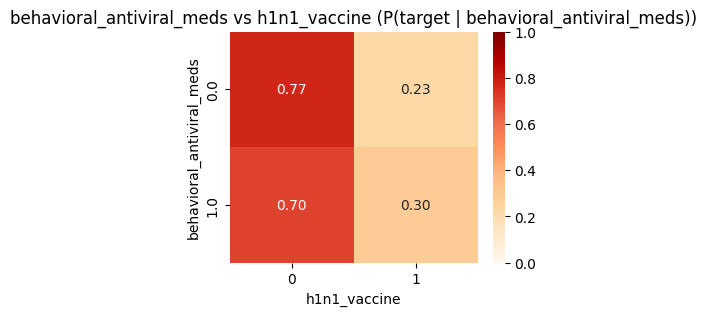

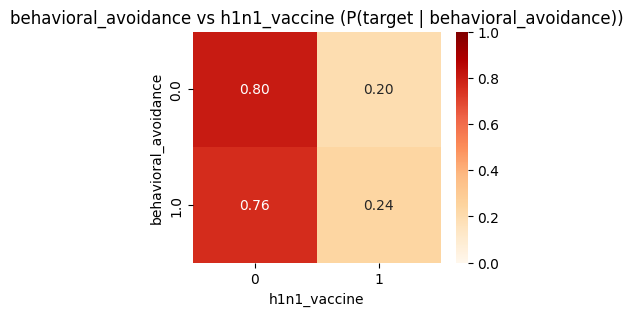

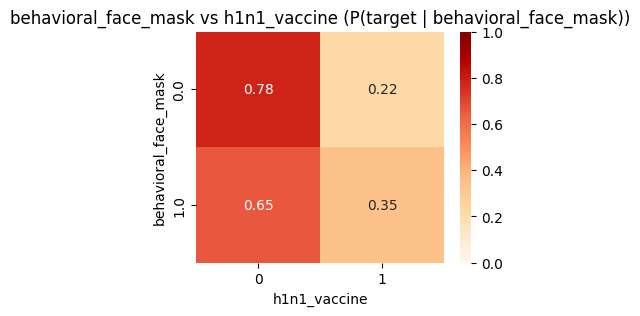

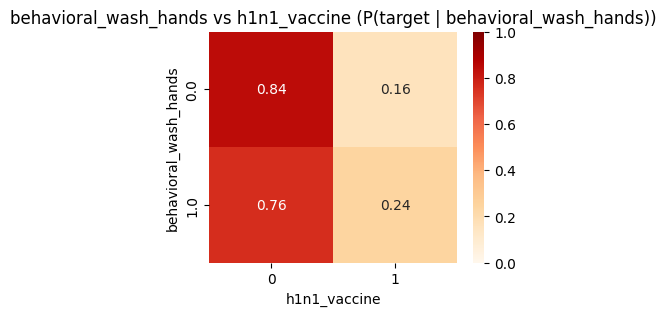

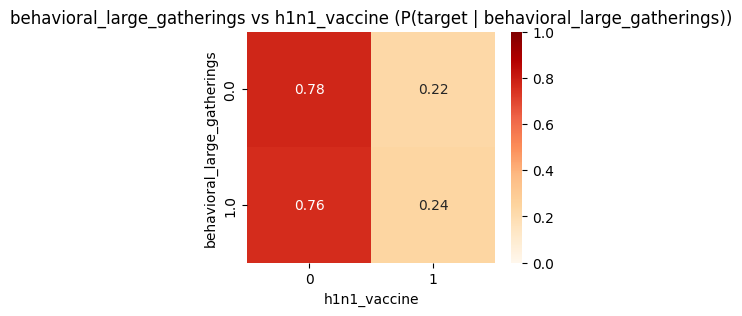

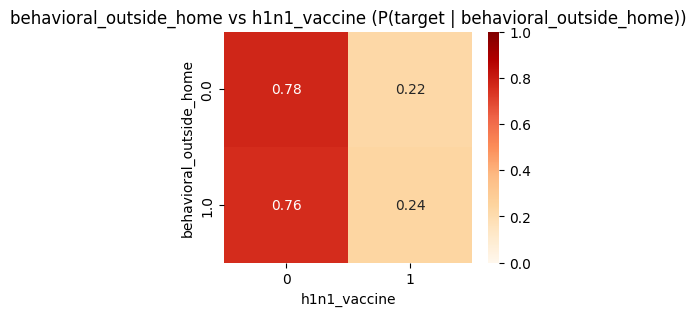

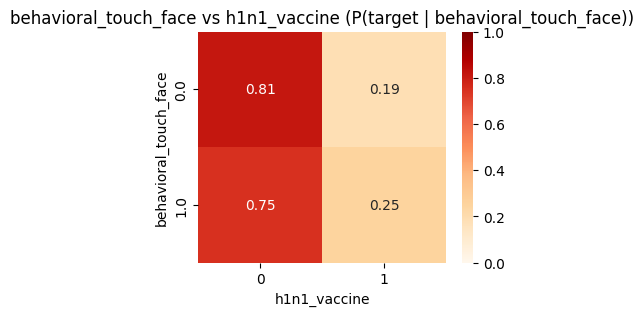

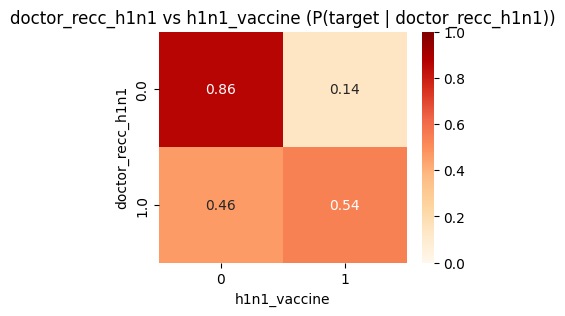

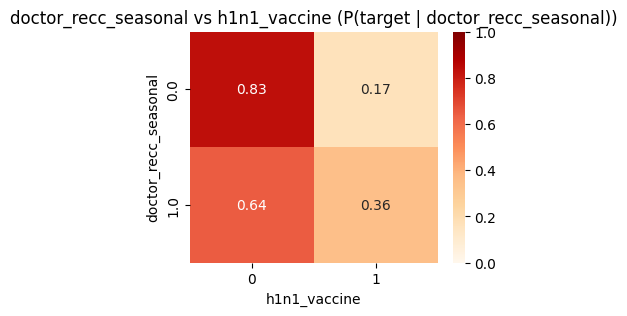

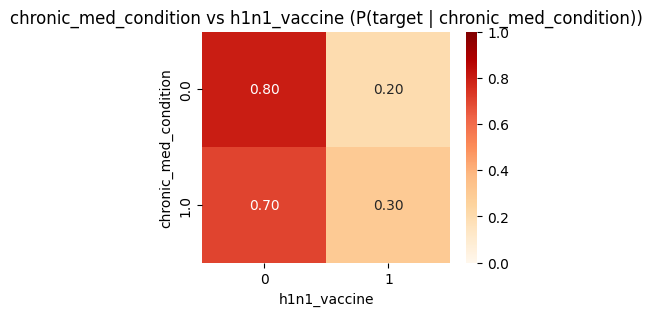

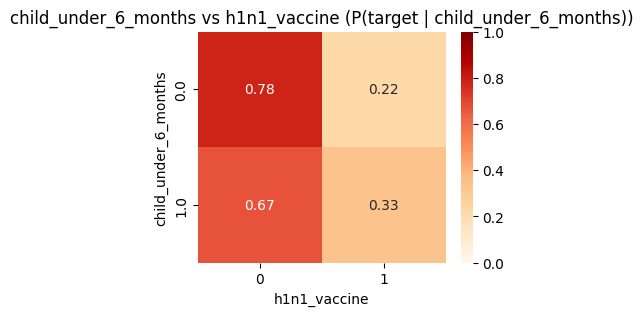

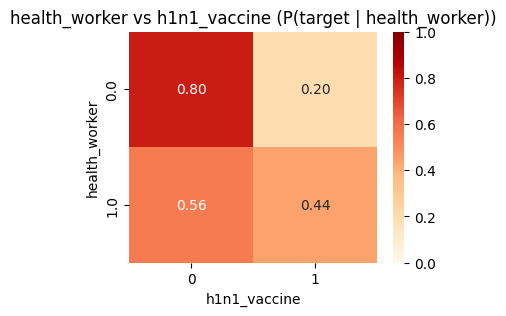

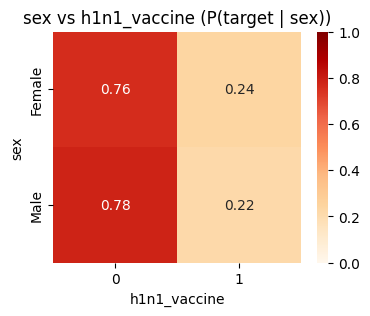

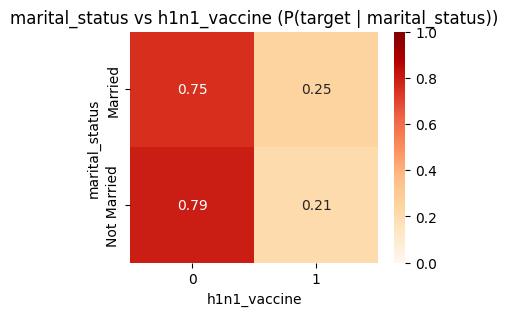

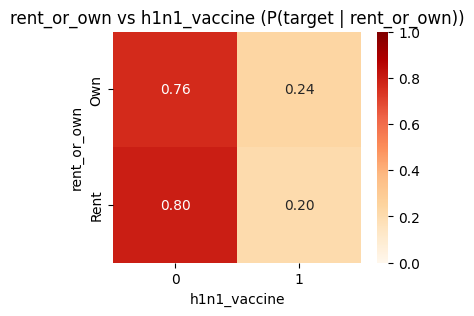

In [38]:
target = "h1n1_vaccine"

for col in binary_cols:
    plt.figure(figsize=(4,3))

    cont = pd.crosstab(test[col], results[target], normalize="index")

    sns.heatmap(cont, annot=True, fmt=".2f", cmap="OrRd",
                vmin=0, vmax=1)
    plt.title(f"{col} vs {target} (P(target | {col}))")
    plt.xlabel(target)
    plt.ylabel(col)
    plt.show()

In [ ]:
threshold = 0.2
test = df.copy()
for col in test.columns:
    if test[col].isna().sum()/len(test)>threshold:
        test.drop(columns=col, axis=1, inplace=True)

In [6]:
test = df.copy()
test.dropna()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,0.0,arjwrbjb,bxpfxfdn
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,1.0,mcubkhph,oijqvulv
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe
